## Communications Analysis

This study aims to analyze and extract insights from the given data. The following listed below are some of the questions that need to be answered:

 - Profiling our customers through individual details such as age, gender, country, and etc.
 - Message click rate and conversion rate from both channels (Email and SMS)
 - The number of messages sent to the customers until the message are click and converted to leads.
 - Time of day where messages are clicked.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'G:\data-1701920400701.csv')
df.head(10)

,message_id,customer_id,sent_at_date,sent_at_time,sent_at_time_unit,24h_format,time category,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,1/4/2021,10:03:00,AM,10:03,10:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,SMS,1
1,0f98a1bbf7f2b66f420816a65c8d9b77,f13e966f9dc1e2aa7bffec6c9efa8e11,1/12/2021,8:34:00,AM,8:34,8:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,SMS,2
2,97f9ed967d2334ce0b4ebfcfc9b5c25c,f13e966f9dc1e2aa7bffec6c9efa8e11,1/19/2021,8:58:00,AM,8:58,8:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,3
3,3d0615ca493d69e16265ab688495c134,f13e966f9dc1e2aa7bffec6c9efa8e11,1/28/2021,10:43:00,AM,10:43,10:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,4
4,3eb3a03a007bd1adf7482e6d95f7b942,f13e966f9dc1e2aa7bffec6c9efa8e11,2/4/2021,11:28:00,AM,11:28,11:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,5
5,4a55bc2d2f8c121dafb1468741e45c53,f13e966f9dc1e2aa7bffec6c9efa8e11,2/11/2021,9:38:00,AM,9:38,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,6
6,7baa4d8167b2452373007d1b80138dca,f13e966f9dc1e2aa7bffec6c9efa8e11,2/18/2021,10:14:00,AM,10:14,10:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,7
7,32bebd7de86675fd83585eb8595f941a,f13e966f9dc1e2aa7bffec6c9efa8e11,2/23/2021,3:40:00,PM,15:40,3:00PM - 4:00PM,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,8
8,ed3fd7f6bf8c14ab5b13b90ea9c0a3a8,f13e966f9dc1e2aa7bffec6c9efa8e11,3/4/2021,1:18:00,PM,13:18,1:00PM- 2:00PM,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,9
9,67e30005e2f18959c9b686f370e2dba7,f13e966f9dc1e2aa7bffec6c9efa8e11,3/9/2021,8:28:00,AM,8:28,8:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,Email,10


### Understanding our data set

The following itemises the columns in the provided table public.comms: 
- message_id: varchar (The message ID) 
- customer_id: varchar (The customer ID) 
- sent_at: timestamp (When was the message sent localised to the assumed customer timezone) 
- clicked: int (Was the message clicked) 
- converted: int (Did the message lead to a conversion) 
- client_id: varchar (The ID of the associated client) 
- gender: varchar (The gender of the customer) 
- customer_country: varchar (The country where the customer is based) 
- age: int (The age of the customer) 
- created_at: timestamp (When was the customer created) 
- client_name: varchar (The client name) 
- product_type: varchar (The type of product offered by the client) 
- client_country: varchar (The country where the client is based) 
- channel: varchar (The channel used in the communication) 
- message_number: int (The sequence number of messages sent to customer) 

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145941 entries, 0 to 145940
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   message_id         145941 non-null  object 
 1   customer_id        145941 non-null  object 
 2   sent_at_date       145941 non-null  object 
 3   sent_at_time       145941 non-null  object 
 4   sent_at_time_unit  145941 non-null  object 
 5   24h_format         145941 non-null  object 
 6   time category      145941 non-null  object 
 7   clicked            145941 non-null  int64  
 8   converted          145941 non-null  int64  
 9   client_id          145941 non-null  object 
 10  gender             114265 non-null  object 
 11  customer_country   115795 non-null  object 
 12  age                123921 non-null  float64
 13  created_at         145941 non-null  object 
 14  client_name        145941 non-null  object 
 15  product_type       145941 non-null  object 
 16  cl

Non-null count shows missing data from gender, customer_country and age columns.
To explore more about customer attributes, data needs to extract distinct customer id by removing duplicates.

In [4]:
df_distinct = df.drop_duplicates(subset = 'customer_id')
df_distinct.head(20)

,message_id,customer_id,sent_at_date,sent_at_time,sent_at_time_unit,24h_format,time category,clicked,converted,client_id,gender,customer_country,age,created_at,client_name,product_type,client_country,channel,message_number
0,28d82c62db5989d9441351f58738c6a8,f13e966f9dc1e2aa7bffec6c9efa8e11,1/4/2021,10:03:00,AM,10:03,10:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,51.0,1/3/2021 15:58,SwanPay,BNPL,UK,SMS,1
37,9a80a0717dee0e4038ee804372d6745c,26c5f8755c296b92685959c57114ba75,1/4/2021,12:54:00,PM,0:54,12:00AM - 1:00AM,0,0,cfcd208495d565ef66e7dff9f98764da,F,NZ,28.0,1/3/2021 16:55,SwanPay,BNPL,UK,Email,1
76,f6338afe5634c04f4f731b46d6e98e00,06e72df8cce37d99724e98a89ff031e0,1/4/2021,4:15:00,PM,16:15,4:00PM - 5:00PM,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,24.0,1/3/2021 18:20,SwanPay,BNPL,UK,SMS,1
79,c23126245c7db435debd519836b8d251,e6717778f83882b9ff53eeaac7b4f0ec,1/5/2021,9:15:00,AM,9:15,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,M,UK,26.0,1/2/2021 0:41,SwanPay,BNPL,UK,Email,1
117,b64e5887b5730345f7161d620c28d118,af619bc3c632139b350370727103dcfb,1/5/2021,9:25:00,AM,9:25,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NZ,22.0,1/1/2021 9:43,SwanPay,BNPL,UK,SMS,1
156,02d1213942feb5f8931a3a1c46ac7214,6c106790e67f6988b943e6971cbe1d04,1/5/2021,9:41:00,AM,9:41,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NaN,29.0,1/1/2021 8:52,SwanPay,BNPL,UK,SMS,1
183,99e0d135cc72193254cbad145e190790,15c286543a1dbf6ab2c855747f751cb7,1/5/2021,9:46:00,AM,9:46,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,NaN,NaN,27.0,1/1/2021 1:49,SwanPay,BNPL,UK,Email,1
219,2e48b2f98defb24a2b1f92eb682619dc,ab93a807d958811fdcf7e1f8fc39bd2a,1/6/2021,8:19:00,AM,8:19,8:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,NaN,1/3/2021 21:58,SwanPay,BNPL,UK,Email,1
227,79456ff59205d91a7fe0a7f5751028e5,690a2430fd320f8b4c1f152bf38dd660,1/6/2021,9:07:00,AM,9:07,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,NZ,26.0,1/3/2021 7:34,SwanPay,BNPL,UK,Email,1
266,10f08590b2a0eefd978592e5b4101e9c,abd9d49a461b10861017f60f1b4770d9,1/6/2021,9:39:00,AM,9:39,9:00,0,0,cfcd208495d565ef66e7dff9f98764da,F,UK,19.0,1/3/2021 0:00,SwanPay,BNPL,UK,Email,1


In [5]:
df_distinct.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9751 entries, 0 to 145940
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   message_id         9751 non-null   object 
 1   customer_id        9751 non-null   object 
 2   sent_at_date       9751 non-null   object 
 3   sent_at_time       9751 non-null   object 
 4   sent_at_time_unit  9751 non-null   object 
 5   24h_format         9751 non-null   object 
 6   time category      9751 non-null   object 
 7   clicked            9751 non-null   int64  
 8   converted          9751 non-null   int64  
 9   client_id          9751 non-null   object 
 10  gender             7774 non-null   object 
 11  customer_country   7854 non-null   object 
 12  age                8367 non-null   float64
 13  created_at         9751 non-null   object 
 14  client_name        9751 non-null   object 
 15  product_type       9751 non-null   object 
 16  client_country     975

In [6]:
df_distinct.dropna()
df_distinct.to_csv('G:/TakeHome Exercise Ref/distinct_data.csv')

### Exploratory Data Analysis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


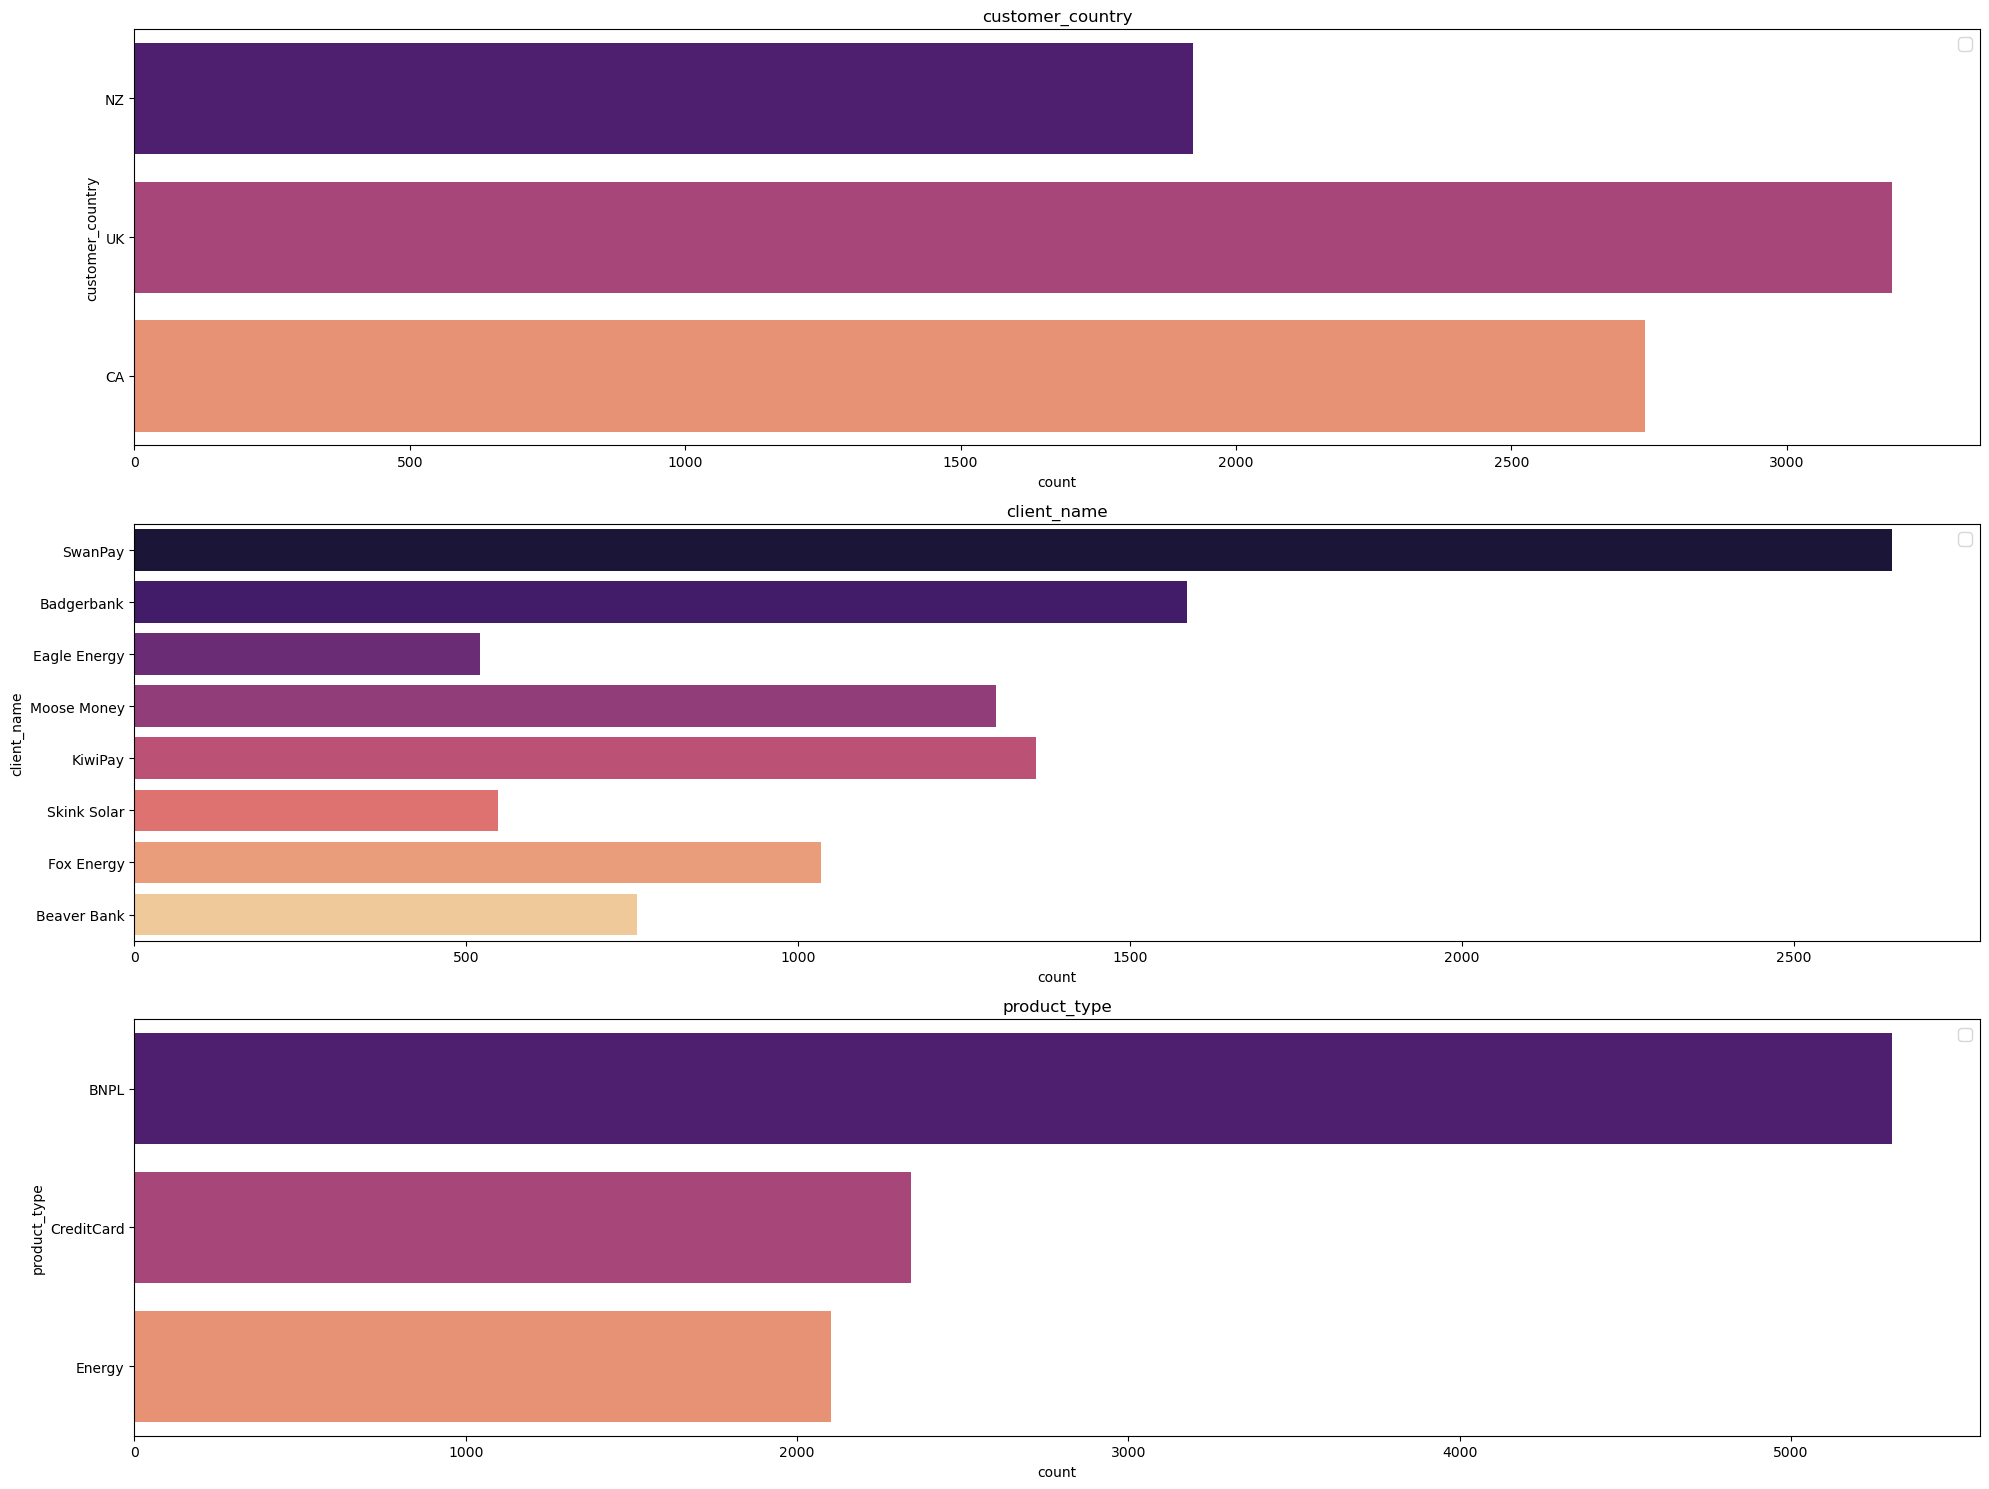

<Figure size 640x480 with 0 Axes>

In [7]:
categories = ['customer_country', 'client_name', 'product_type']

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20,15))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=15)

for i, cat in enumerate(categories):
    sns.countplot(data=df_distinct, y=cat, ax=axes[i], palette='magma')
    axes[i].legend(loc='upper right', fontsize='large')
    axes[i].set_title(cat)
    
fig.tight_layout()
plt.show()
plt.clf()

### Manipulating our dataset to create a dataframe that calculates the click rate.

In [8]:
df_clickrate = df.groupby(['client_name', 'channel', 'clicked'])['message_number'].count().reset_index()
# df_clickrate.head(230)

In [9]:
df_noclick  = df_clickrate[df_clickrate.clicked==0].reset_index().drop(columns='index')
df_noclick.rename(columns = {'clicked': 'noclick', 'message_number': 'noclick_number'}, inplace = True)
# df_noclick.head(30)

In [10]:
df_clicked  = df_clickrate[df_clickrate.clicked==1].reset_index().drop(columns='index')
# df_clicked.head(30)

In [11]:
df_clickrated = pd.merge(df_noclick, df_clicked)
df_clickrated['clickrate'] = df_clickrated.message_number.div(df_clickrated.noclick_number + df_clickrated.message_number)*100
# df_clickrated.to_csv('G:/TakeHome Exercise Ref/clickrated.csv')
df_clickrated.head(50)

,client_name,channel,noclick,noclick_number,clicked,message_number,clickrate
0,Badgerbank,Email,0,17850,1,390,2.138158
1,Badgerbank,SMS,0,10324,1,443,4.114424
2,Beaver Bank,Email,0,7344,1,395,5.104019
3,Beaver Bank,SMS,0,4228,1,441,9.445277
4,Eagle Energy,Email,0,4778,1,271,5.367399
5,Eagle Energy,SMS,0,2758,1,296,9.692207
6,Fox Energy,Email,0,10488,1,277,2.573154
7,Fox Energy,SMS,0,6029,1,343,5.382925
8,KiwiPay,Email,0,12104,1,682,5.333959
9,KiwiPay,SMS,0,7234,1,856,10.580964


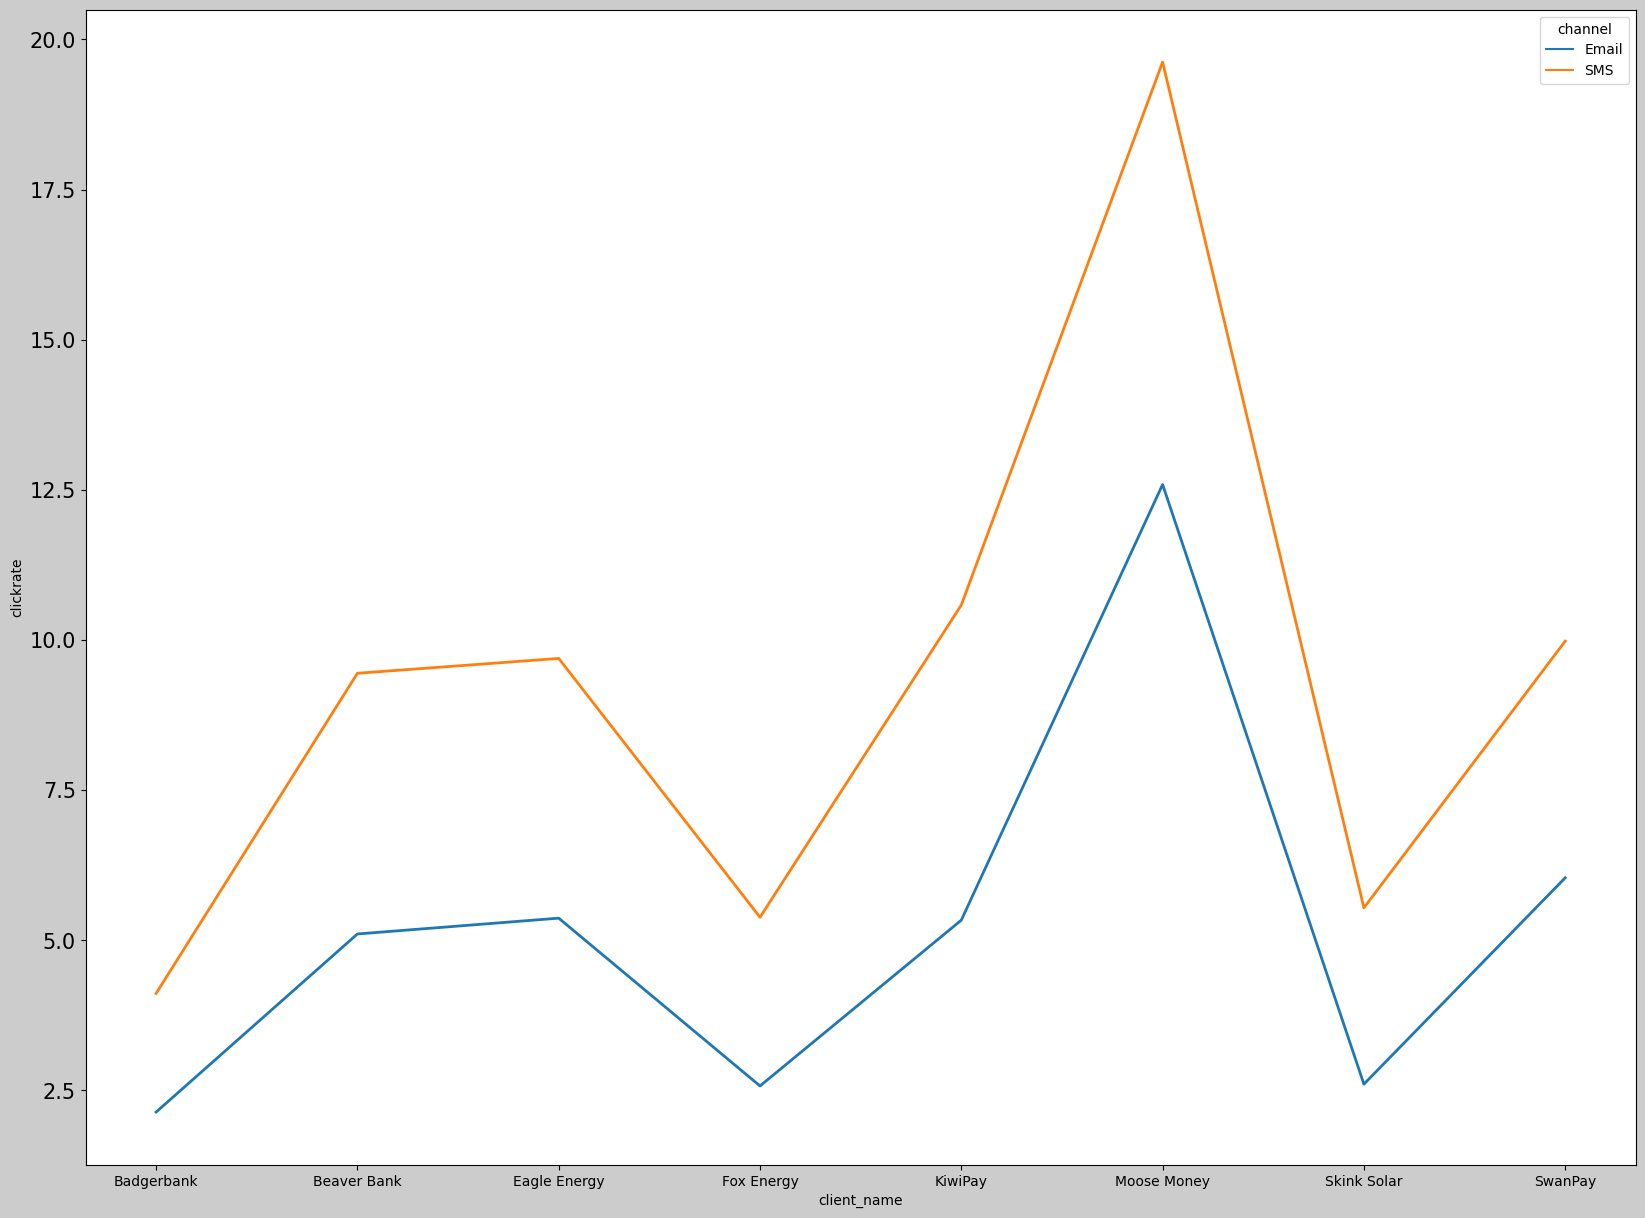

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(20,15))
sns.lineplot(x='client_name', y='clickrate', hue='channel', data=df_clickrated, linewidth=2, ci=None)
plt.show()
plt.clf()

### Manipulating our dataset to create a dataframe that calculates the conversion rate.

In [13]:
df_convert = df.groupby(['client_name', 'channel', 'clicked', 'converted'])['message_number'].count().reset_index()
df_convert = df_convert[df_convert.clicked==1].reset_index().drop(columns='index')
# df_convert.head(230)

In [14]:
df_notconverted  = df_convert[df_convert.converted==0].reset_index().drop(columns='index')
df_notconverted.rename(columns = {'converted': 'unconverted', 'message_number': 'uncoverted_number'}, inplace = True)
df_converted  = df_convert[df_convert.converted==1].reset_index().drop(columns='index')
# df_notconverted.head(20)

In [15]:
# df_converted.head(20)

In [16]:
df_converted = pd.merge(df_notconverted, df_converted)
df_converted['convert_rate'] = df_converted.message_number.div(df_converted.uncoverted_number + df_converted.message_number)*100
# df_converted.to_csv('G:/TakeHome Exercise Ref/convertrate.csv')
df_converted.head(50)

,client_name,channel,clicked,unconverted,uncoverted_number,converted,message_number,convert_rate
0,Badgerbank,Email,1,0,287,1,103,26.410256
1,Badgerbank,SMS,1,0,377,1,66,14.898420
2,Beaver Bank,Email,1,0,282,1,113,28.607595
3,Beaver Bank,SMS,1,0,379,1,62,14.058957
4,Eagle Energy,Email,1,0,189,1,82,30.258303
5,Eagle Energy,SMS,1,0,233,1,63,21.283784
6,Fox Energy,Email,1,0,176,1,101,36.462094
7,Fox Energy,SMS,1,0,265,1,78,22.740525
8,KiwiPay,Email,1,0,460,1,222,32.551320
9,KiwiPay,SMS,1,0,705,1,151,17.640187


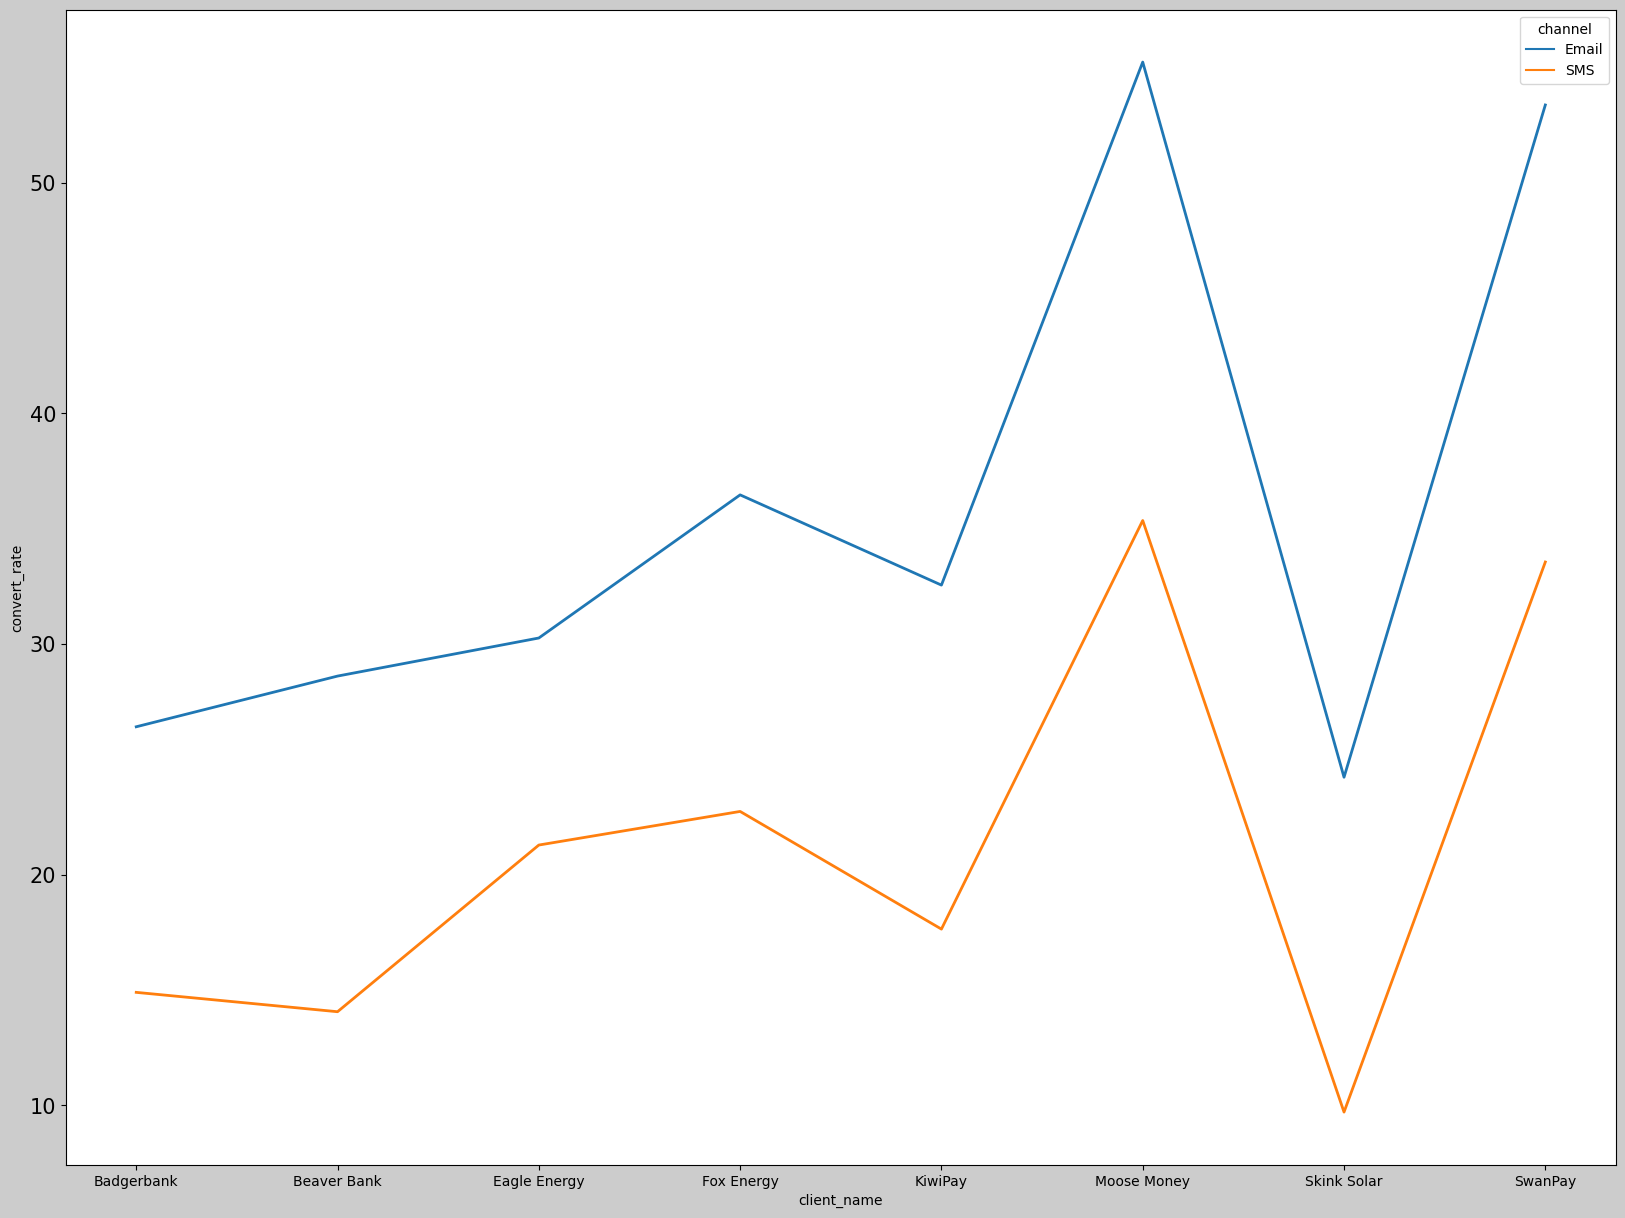

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(20,15))
sns.lineplot(x='client_name', y='convert_rate', hue='channel', data=df_converted, linewidth=2, ci=None)
plt.show()
plt.clf()

- SMS have higher click rate compared to Email however, emails have higher rate of converting to leads.

### Plotting the number of daily messages sent in terms of time wihtin a given day.

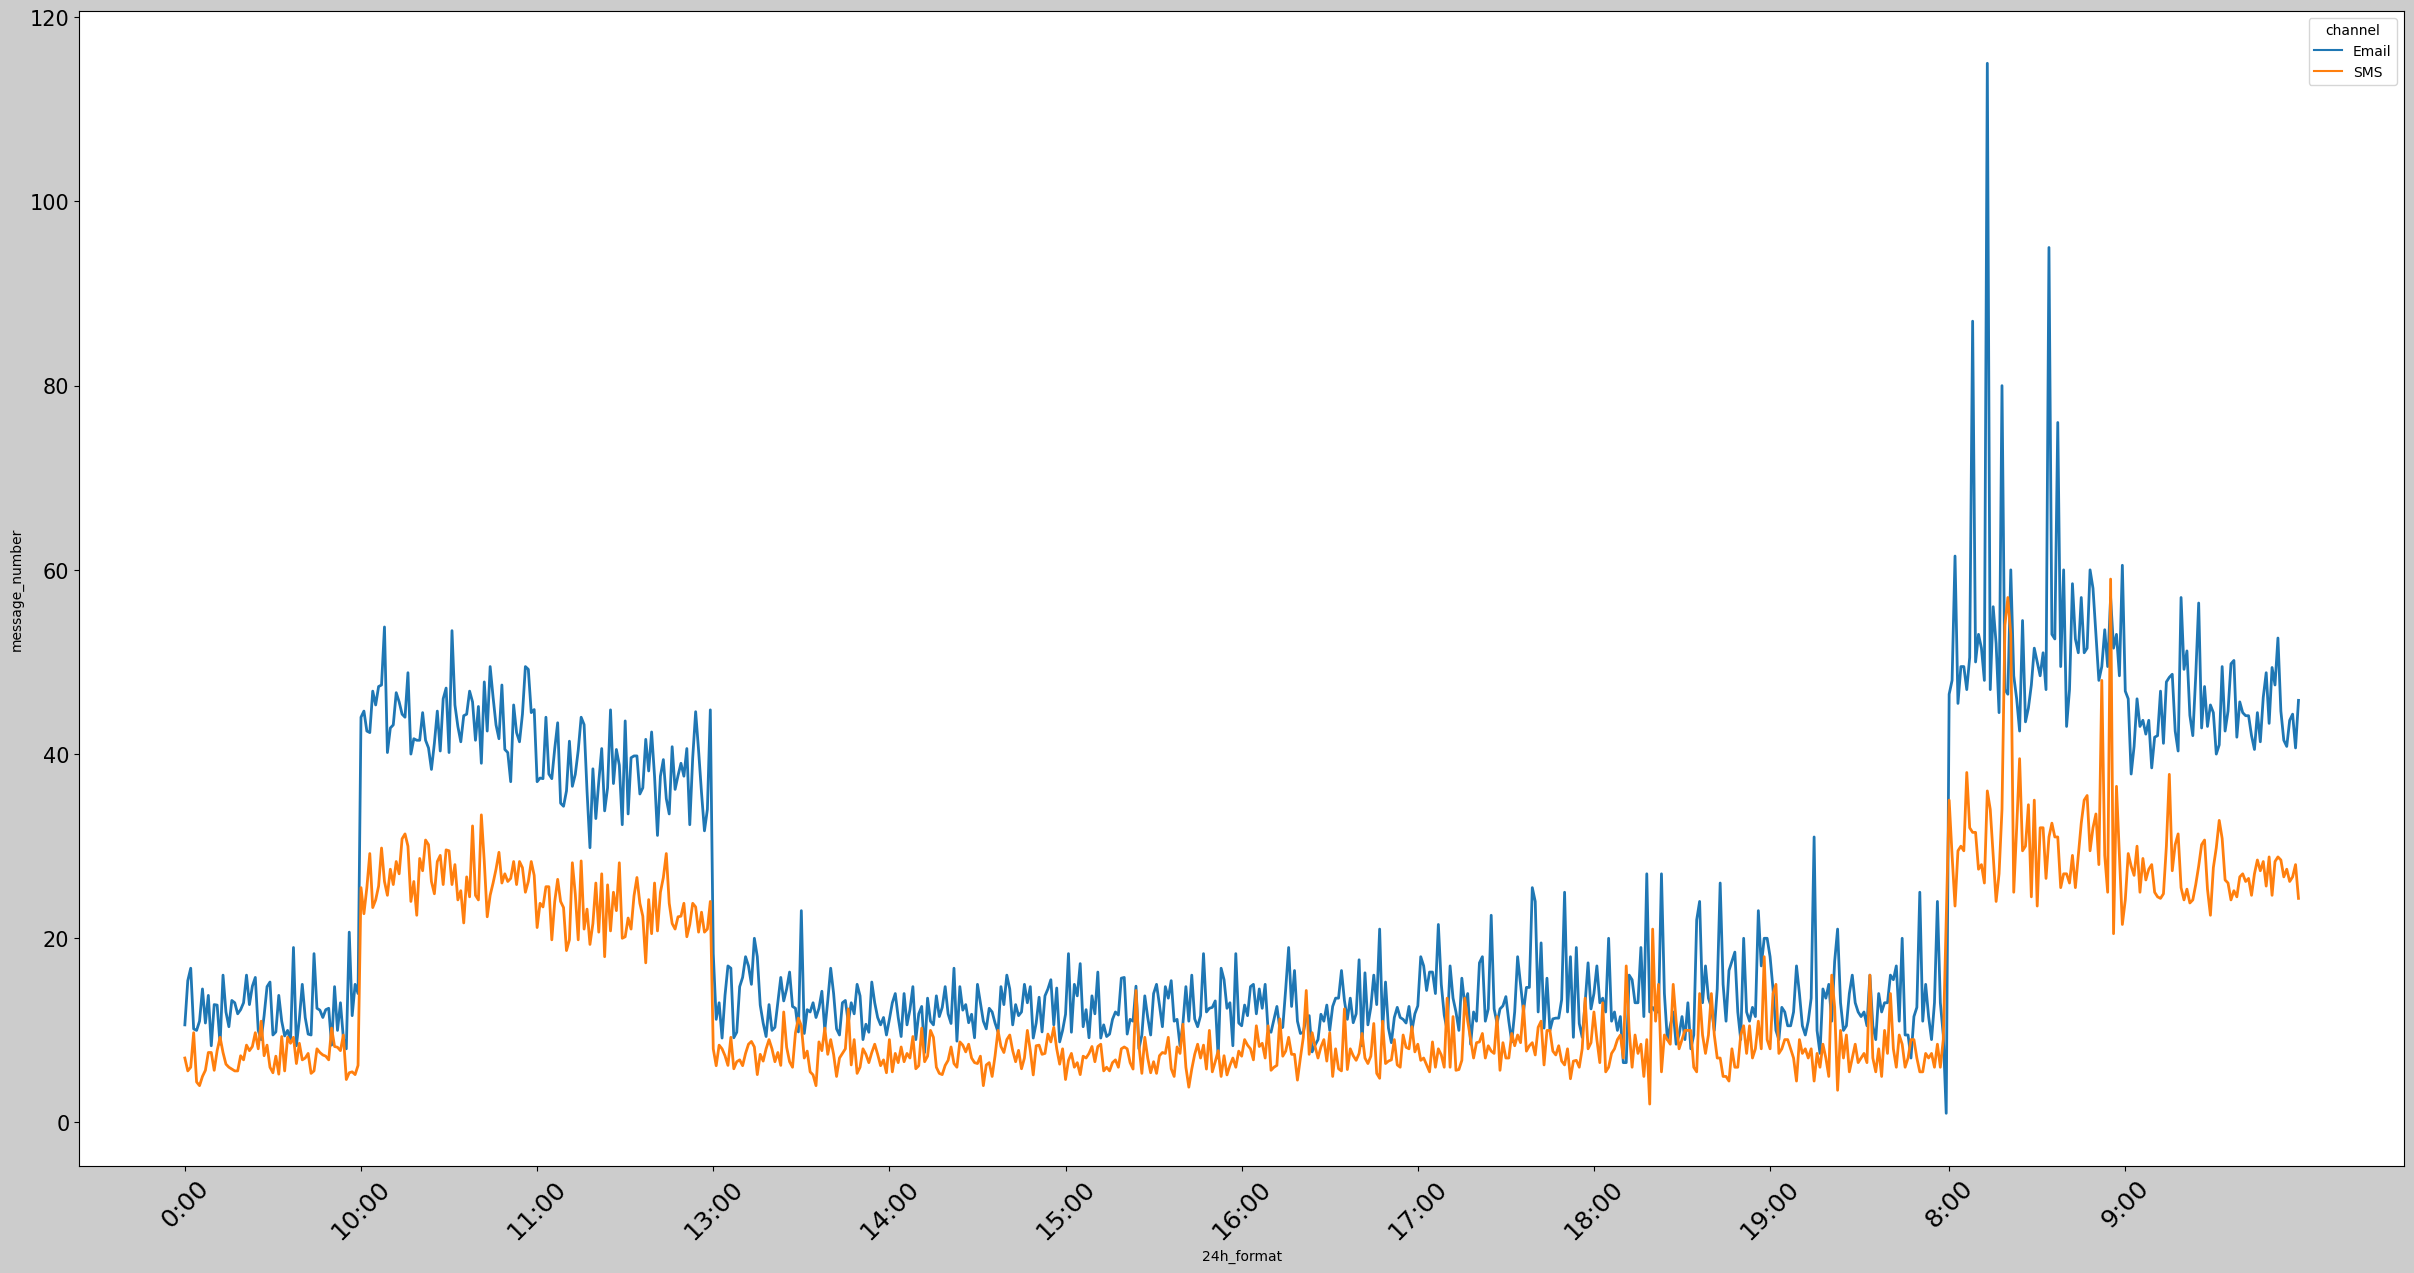

<Figure size 640x480 with 0 Axes>

In [18]:
time_axis  = ['0:00', '8:00','9:00', '10:00', '11:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00']
df_time = df.groupby(['clicked', '24h_format', 'channel', 'customer_country'])['message_number'].count().reset_index()
# df_time.to_csv('G:/TakeHome Exercise Ref/time1.csv')
# df_time2 = df.groupby(['time category', 'channel', 'customer_country'])['clicked'].count().reset_index()
# df_time.sort_values(by=['sent_at_time'], ascending = True, inplace = True)
# df_time.head(50)
plt.figure(figsize=(30,15))
ax = sns.lineplot(x='24h_format', y='message_number', hue='channel', data=df_time, linewidth=2, ci=None)
# plt.scatter(df_time['24h_format'], df_time[df_time.clicked==1])
# sns.lineplot(x='time category', y='clicked', data=df_time2, linewidth=2, ci=None)
plt.xticks(rotation=45)
plt.xticks(fontsize=18)
ax.set_xticks(time_axis)
plt.show()
plt.clf()

### Plotting the number of daily clicked messages sent in terms of time wihtin a given day.

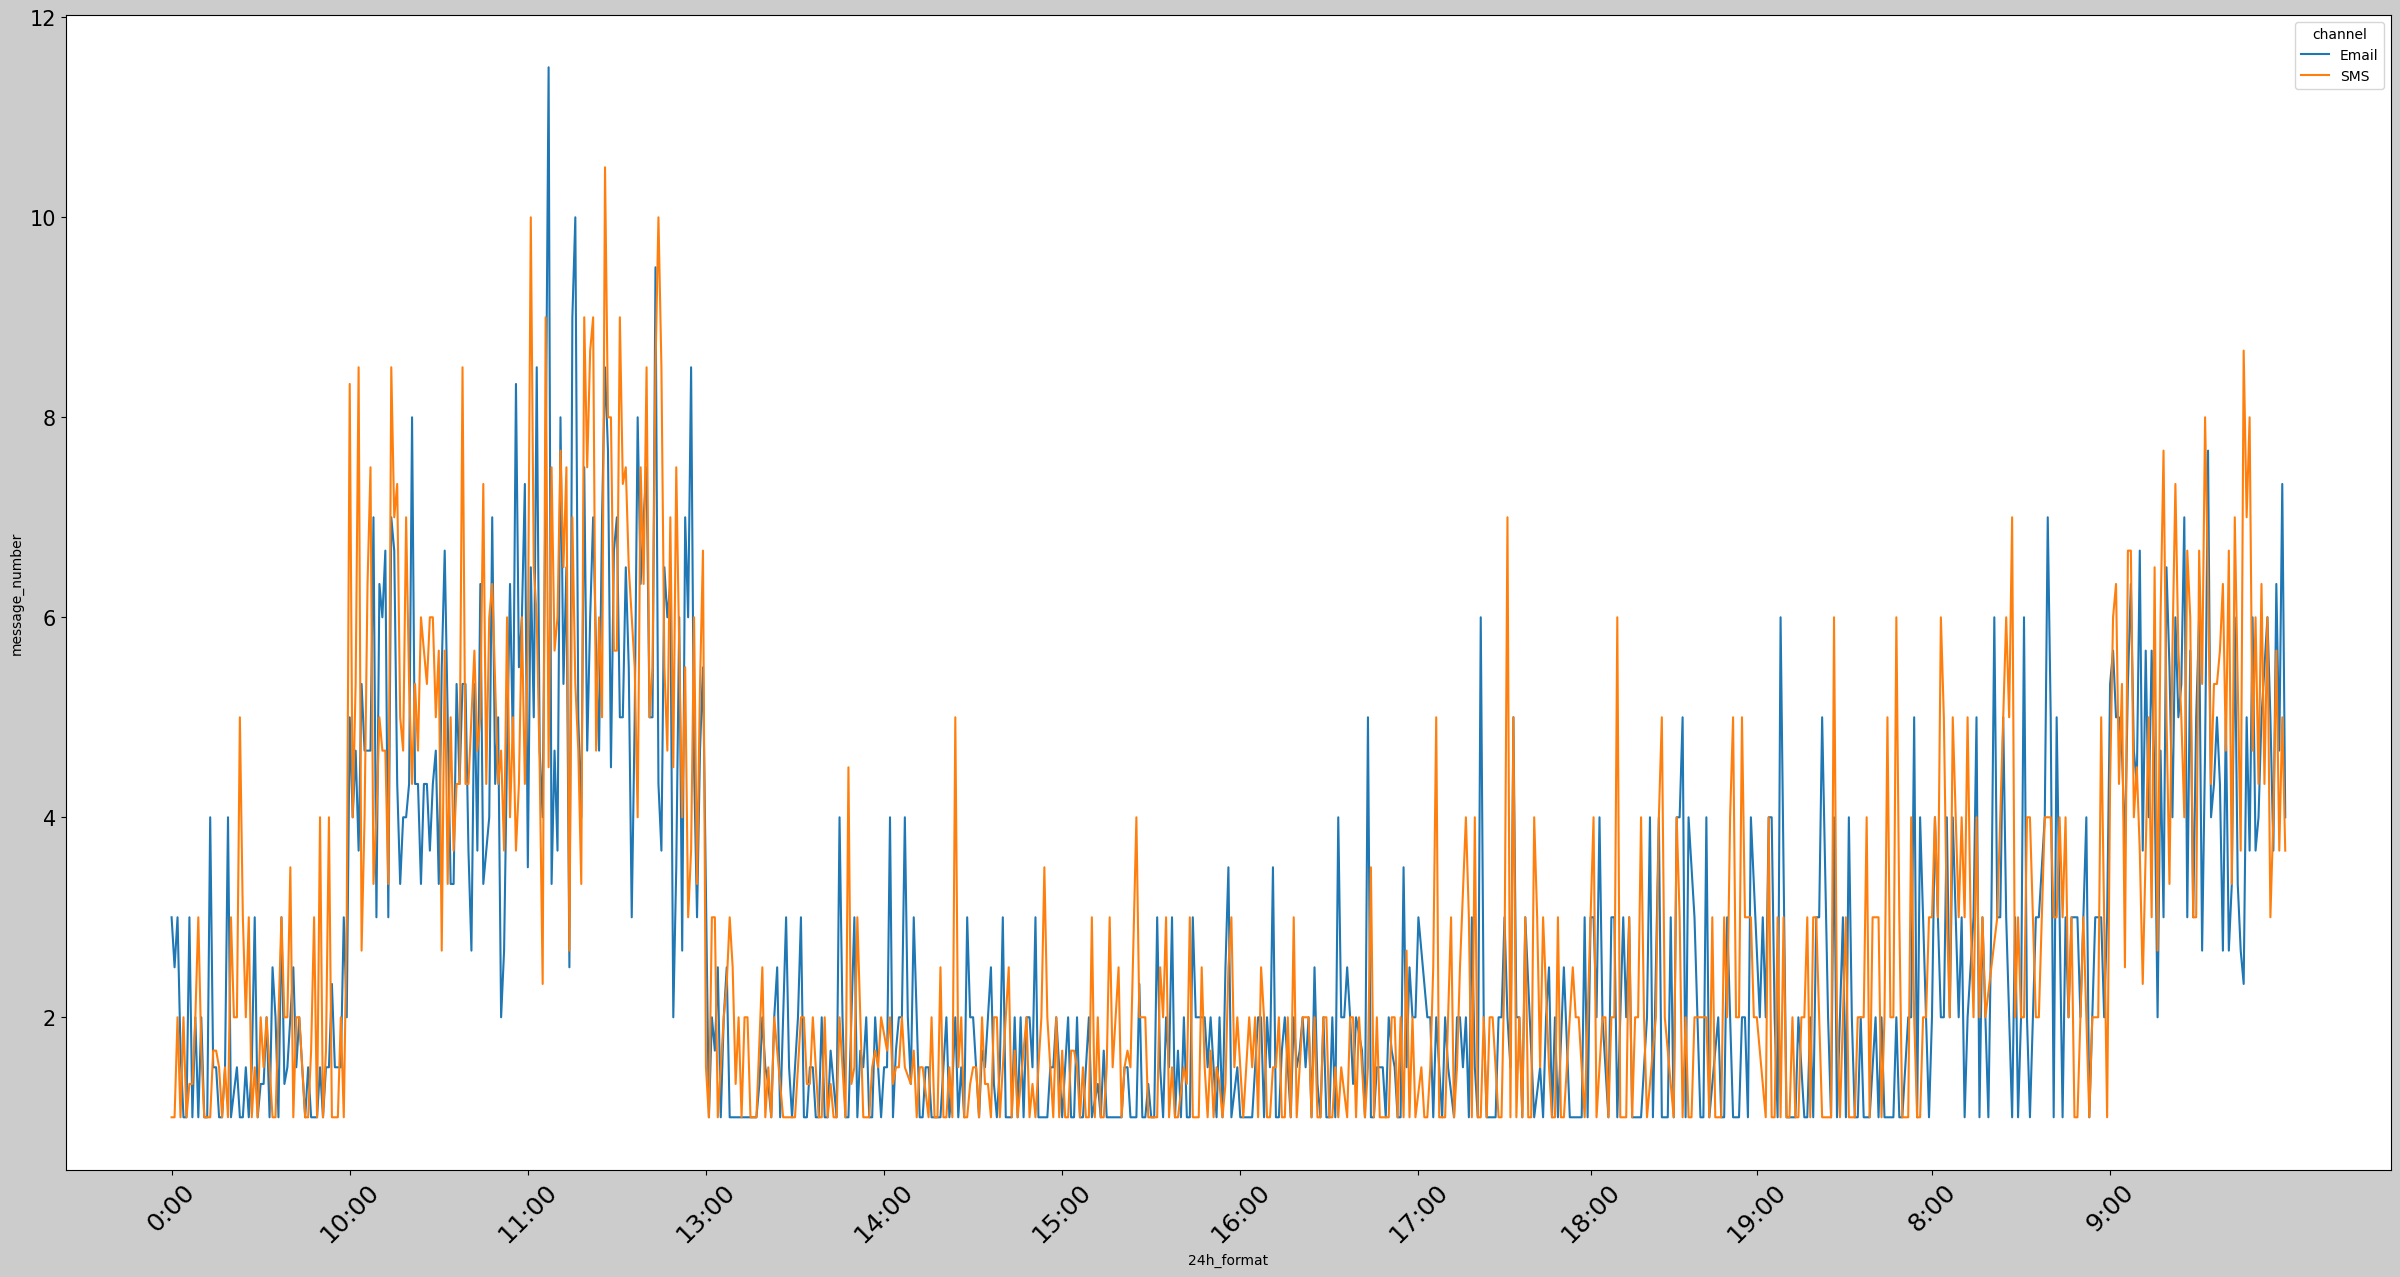

<Figure size 640x480 with 0 Axes>

In [19]:
df_time2 = df_time[df_time.clicked==1].reset_index().drop(columns='index')
# df_time2.to_csv('G:/TakeHome Exercise Ref/time2.csv')
df_time2.head(50)
plt.figure(figsize=(30,15))
ax = sns.lineplot(x='24h_format', y='message_number', hue='channel', data=df_time2, ci=None)
plt.xticks(rotation=45)
plt.xticks(fontsize=18)
ax.set_xticks(time_axis)
plt.show()
plt.clf()

### Communication Segmentation by Clustering

In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [21]:
df_clus = df_distinct.copy()
LE=LabelEncoder()
for i in df_clus:
    df_clus[i]=df_clus[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [22]:
df_kmean = df_clus[['customer_id', 'clicked',"client_name", 
                    'product_type', 'message_number']]
# #Scaling
scaler = StandardScaler()
scaler.fit(df_kmean)
scaled_df = pd.DataFrame(scaler.transform(df_kmean),columns= df_kmean.columns )
print("All features are now scaled")

All features are now scaled


In [23]:
print("Variables to be used for further modeling:")
scaled_df.head()

Variables to be used for further modeling:


,customer_id,clicked,client_name,product_type,message_number
0,1.541101,-0.280234,1.198151,-0.831841,-0.049832
1,-1.198989,-0.280234,1.198151,-0.831841,-0.049832
2,-1.624231,-0.280234,1.198151,-0.831841,-0.049832
3,1.401840,-0.280234,1.198151,-0.831841,-0.049832
4,0.636974,-0.280234,1.198151,-0.831841,-0.049832


In [24]:
#For visualization we will use n_components to 3
pca = PCA(n_components=3)
pca.fit(scaled_df)
PCA_df = pd.DataFrame(pca.transform(scaled_df), columns=(["A","B", "C"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,9751.0,1.579361e-15,1.245633,-1.794958,-1.401508,0.498546,1.292795,3.078847
B,9751.0,-6.103893e-17,1.005647,-2.326810,-0.293852,0.037711,0.367480,26.978995
C,9751.0,4.194505e-17,0.998956,-2.141685,-0.822407,-0.004794,0.798231,12.015031


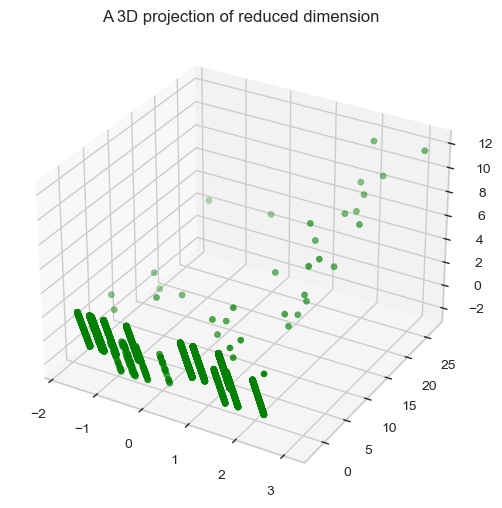

In [25]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_df["A"]
y =PCA_df["B"]
z =PCA_df["C"]
#To plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="Green", marker="o" )
ax.set_title("A 3D projection of reduced dimension")
plt.show()

###  Clustering

Elbow Method to determine the number of clusters to be formed:


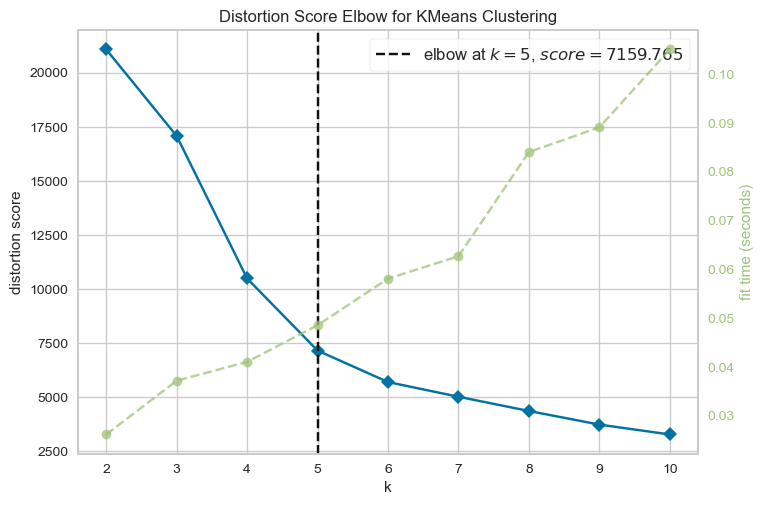

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

From the elbow visualization above, it seems that k=6 is the optimal number of clusters in this data. Now, lets fit this clusters using Agglomerative Clustering.

In [27]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=5)
# fit model and predict clusters
y_clus = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = y_clus
#Adding the cluster to our original data
df_distinct["Clusters"]= y_clus

C:\Users\JARVIS GAMING\AppData\Local\Temp\ipykernel_30620\1631219673.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_distinct["Clusters"]= y_clus


**Checking our final clusters using 3D Projection**

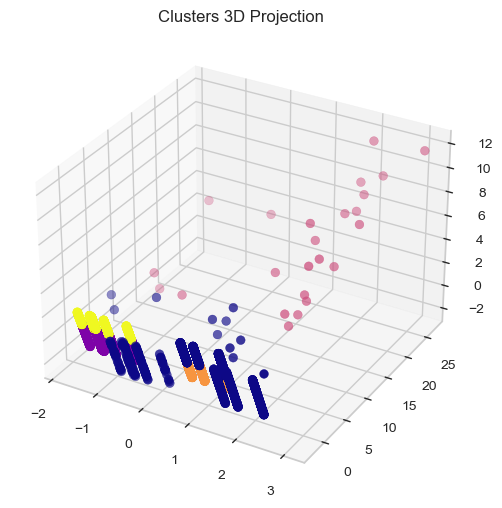

In [28]:
#Plotting the clusters
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'plasma' )
ax.set_title("Clusters 3D Projection")
plt.show()

### Cluster Profiling

In this section, we will evaluate the clusters to see the segmentation  preferences when it comes to channel, client name, sent at time and message number.

Text(0.5, 1.0, 'Distribution Of The Clusters')

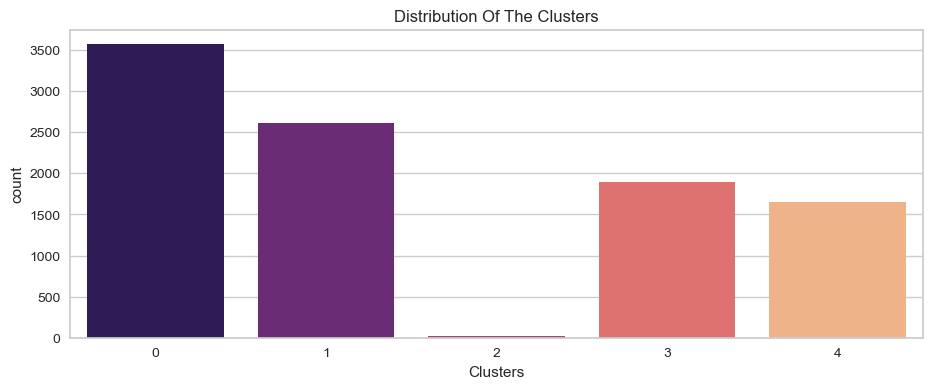

In [29]:
plt.figure(figsize=(11,4))
sns.countplot(x=df_distinct["Clusters"], palette= 'magma')
plt.title("Distribution Of The Clusters")

**Cluster vs. Channel**

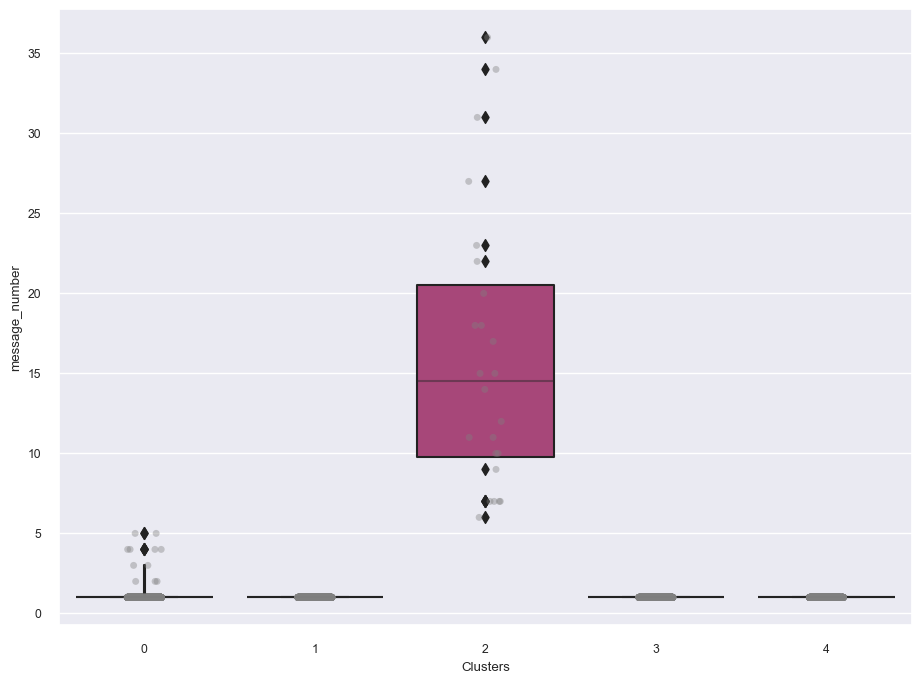

In [30]:
plt.figure(figsize=(11,8))
sns.set(font_scale=0.8)
plt.subplot(1,1,1)
sns.stripplot(x=df_distinct["Clusters"], y=df_distinct["message_number"], color= "#808080", alpha=0.4)
sns.boxenplot(x=df_distinct["Clusters"], y=df_distinct["message_number"], palette='magma')
plt.show()

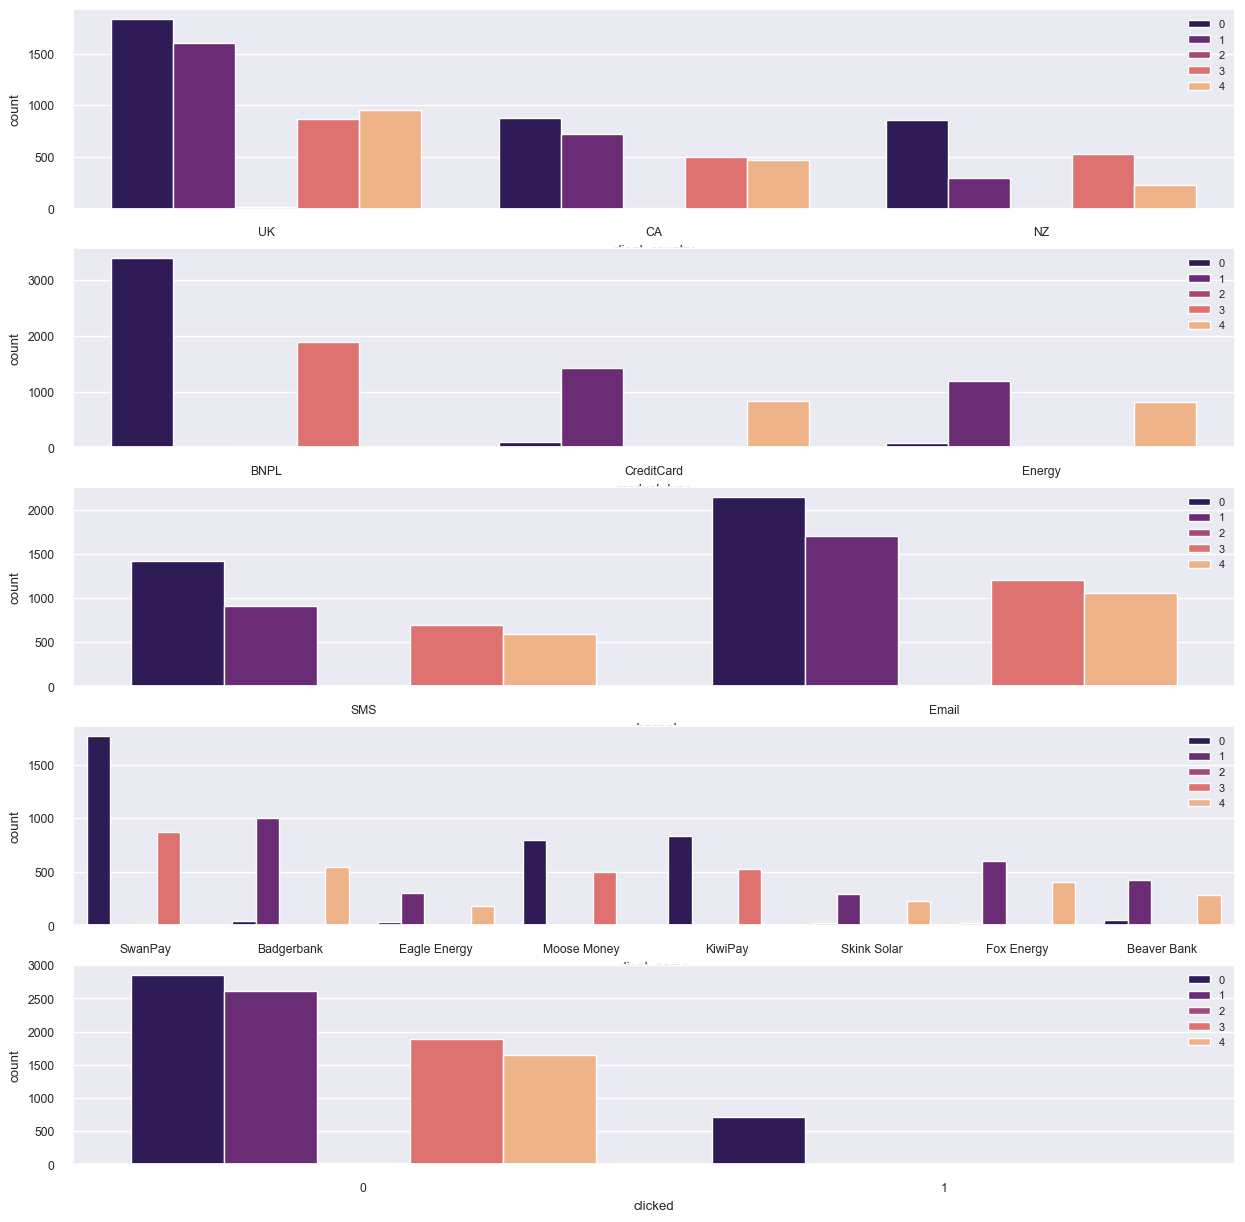

<Figure size 800x550 with 0 Axes>

In [31]:
category = ['client_country', 'product_type', 'channel', 'client_name', 'clicked']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,15))
axes = axes.flatten()
plt.rcParams['figure.facecolor']='0.8'
plt.rc('ytick', labelsize=10)

for i, cat in enumerate (category):
    sns.countplot(x=cat, hue='Clusters', data=df_distinct, ax=axes[i], palette='magma')
    axes[i].legend(loc='upper right', fontsize='small')
    
plt.show()
plt.clf()

In [33]:
# df_distinct.to_csv('G:/TakeHome Exercise Ref/clustered.csv')